**PROBLEMA DE NEGOCIO**

Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadasy eficaces en la gestión de la pandemia.Como científicos de datos la tarea es analizar los datos del COVID-19 y presentar insights a través de visualisaciones que respondan a las siguientes preguntas clave.

**Preguntas:**



1.  ¿Como ha evolucionado el covid-19 en el país Argentina en comparación con el impacto observado a nivel global?
2.   ¿Cual ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?
3.¿Cual es la evolución del índice de letalidad del covid-19 en el país Argentina, comparado con los países con los índices históricos más elevados?
4. Desde una perspectiva demográfica ¿Cuales son las características que tienen un mayor impacto en el índice de letalidad de un país?
5. ¿Cual es la distribución de dosis únicas, primeras dosis y segundas dosis de vacunas en todas las provincias de Argentina?¿Y que vacunas se uso en Buenas Aires?





##**1. Configuración del Ambiente**

In [62]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as ndates
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import RandomForestRegressor
import requests
from io import StringIO

##**2. Obtención, Tratamiento y Análisis explotarorio(EDA)**

###**2.1 Cargando las Bases de Datos**

In [63]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]
display(df_covid.head())
display(df_population.head())

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
69,70,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,209.694,146.21,71.916,87.268,55.799,138.207,168.929,106.291,0,0
142,143,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.0,SDG region,1828,...,388.622,324.278,173.83,192.276,155.259,284.876,316.977,253.162,-484.702,-0.448
214,215,Estimates,Northern Africa and Western Asia,NaN,1833,NaN,NaN,747.0,SDG region,1828,...,174.739,113.261,53.27,65.448,39.486,118.468,146.064,87.691,-124.728,-0.235
286,287,Estimates,Central and Southern Asia,NaN,1831,NaN,NaN,62.0,SDG region,1828,...,227.047,168.558,75.217,90.827,58.668,161.773,190.486,131.231,-2473.484,-1.223
358,359,Estimates,Eastern and South-Eastern Asia,NaN,1832,NaN,NaN,753.0,SDG region,1828,...,145.643,86.283,47.004,58.936,34.318,100.287,128.133,71.208,-99.778,-0.043


###**2.2 EDA Base Covid World Health Organization**

In [64]:
df_covid_copia = df_covid.copy()#creo una copia para no modificar el original

In [65]:
df_covid_copia.info()# busco si hay nulos en el dataframe y los trabajo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [66]:
df_covid_copia = df_covid_copia[~df_covid_copia['Country_code'].isnull()]# elimino los nulos de la columna 'Country_code'

In [67]:
df_covid_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   WHO_region         45580 non-null  object 
 4   New_cases          36436 non-null  float64
 5   Cumulative_cases   49396 non-null  int64  
 6   New_deaths         24088 non-null  float64
 7   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ MB


In [68]:
df_covid_copia = df_covid_copia[['Date_reported','Country_code','Country','New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']]#elimino las columnas que no me sirven para mi informe

In [69]:
df_covid_copia.isnull().sum()#visualizo la cantidad de nulos en las otras columnas

Date_reported            0
Country_code             0
Country                  0
New_cases            12960
Cumulative_cases         0
New_deaths           25308
Cumulative_deaths        0
dtype: int64

In [70]:
df_covid_copia =df_covid_copia.fillna(0)#decido reemplazar los nulos con el valor 0

In [71]:
df_covid_copia.head()#observo las primeras 5 filas

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,0.0,0,0.0,0


In [72]:
df_covid_copia.isnull().sum()#verifico que la tranformación de datos haya sido correcta en este caso no tengo mas nulos

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [73]:
df_covid_copia.info()#la columna 'Date_reported' es tipo object y necesito cambiar el formato a datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          49396 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         49396 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [74]:
df_covid_copia['Date_reported'] = pd.to_datetime(df_covid_copia['Date_reported'])#convierto la columna 'Date_reported' a tipo datatime

In [75]:
df_covid_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  float64       
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  float64       
 6   Cumulative_deaths  49396 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.0+ MB


In [76]:
df_covid_copia[['New_cases','New_deaths']]= df_covid_copia[['New_cases', 'New_deaths']].astype(int)#cambio el formato de las columnas 'New_cases','New_deaths' a int

In [77]:
df_covid_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  int64         
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  int64         
 6   Cumulative_deaths  49396 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.0+ MB


In [78]:
df_covid_copia['lethality_rate'] = ((df_covid_copia['Cumulative_deaths']/df_covid_copia['Cumulative_cases'])*100).round(2)

In [79]:
df_covid_copia

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,NaN
1,2020-01-12,AF,Afghanistan,0,0,0,0,NaN
2,2020-01-19,AF,Afghanistan,0,0,0,0,NaN
3,2020-01-26,AF,Afghanistan,0,0,0,0,NaN
4,2020-02-02,AF,Afghanistan,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
50875,2023-12-24,ZW,Zimbabwe,23,266048,1,5731,2.15
50876,2023-12-31,ZW,Zimbabwe,23,266071,0,5731,2.15
50877,2024-01-07,ZW,Zimbabwe,46,266117,3,5734,2.15
50878,2024-01-14,ZW,Zimbabwe,85,266202,3,5737,2.16


In [80]:
df_covid_copia =df_covid_copia.fillna(0)

In [81]:
df_covid_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  int64         
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  int64         
 6   Cumulative_deaths  49396 non-null  int64         
 7   lethality_rate     49396 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.4+ MB


In [82]:
df_covid_copia.isnull().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
lethality_rate       0
dtype: int64

In [83]:
df_covid_copia.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,4.939600e+04,4.939600e+04,49396.000000,4.939600e+04,49396.00
mean,1.567324e+04,1.643477e+06,142.040530,1.928293e+04,inf
std,2.408294e+05,7.274286e+06,875.025827,7.909933e+04,NaN
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.00
25%,0.000000e+00,3.846750e+03,0.000000,2.900000e+01,0.33
50%,1.020000e+02,4.283250e+04,0.000000,4.980000e+02,1.06
75%,1.999250e+03,4.998840e+05,20.000000,6.630250e+03,2.05
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,inf


In [84]:
quantile_0 = df_covid_copia['lethality_rate'].quantile(0)
quantile_99 = df_covid_copia['lethality_rate'].quantile(0.99)

df_covid_copia = df_covid_copia[(df_covid_copia['lethality_rate'] >= quantile_0) & (df_covid_copia['lethality_rate'] <= quantile_99)]

In [85]:
df_covid_copia.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,4.890200e+04,4.890200e+04,48902.000000,4.890200e+04,48902.000000
mean,1.578961e+04,1.659527e+06,138.018609,1.938730e+04,1.452991
std,2.420378e+05,7.309166e+06,867.312807,7.947323e+04,1.625940
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.000000
25%,0.000000e+00,3.904000e+03,0.000000,2.900000e+01,0.330000
50%,1.030000e+02,4.379300e+04,0.000000,4.710000e+02,1.030000
75%,2.005750e+03,5.070115e+05,20.000000,6.637750e+03,2.000000
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,12.260000


In [86]:
df_covid_limpio = df_covid_copia.reset_index(drop=True)

In [87]:
df_covid_limpio

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.00
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.00
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.00
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.00
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...
48897,2023-12-24,ZW,Zimbabwe,23,266048,1,5731,2.15
48898,2023-12-31,ZW,Zimbabwe,23,266071,0,5731,2.15
48899,2024-01-07,ZW,Zimbabwe,46,266117,3,5734,2.15
48900,2024-01-14,ZW,Zimbabwe,85,266202,3,5737,2.16


###**2.3 EDA Base Population United Nations**

In [88]:
df_population.head(3)

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
69,70,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,209.694,146.21,71.916,87.268,55.799,138.207,168.929,106.291,0,0
142,143,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.0,SDG region,1828,...,388.622,324.278,173.83,192.276,155.259,284.876,316.977,253.162,-484.702,-0.448
214,215,Estimates,Northern Africa and Western Asia,NaN,1833,NaN,NaN,747.0,SDG region,1828,...,174.739,113.261,53.27,65.448,39.486,118.468,146.064,87.691,-124.728,-0.235


In [89]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           286 non-null    int64  
 1   Variant                                                                                         286 non-null    object 
 2   Region, subregion, country or area *                                                            286 non-null    object 
 3   Notes                                                                                           76 non-null     object 
 4   Location code                                                                                   286 non-null    int64  
 5   ISO3 Alpha-c

In [90]:
df_population_trabajado =df_population[['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']]

In [91]:
df_population_trabajado.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
},inplace=True)

In [92]:
df_population_trabajado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    286 non-null    object
 2   Male_Population     286 non-null    object
 3   Female_Population   286 non-null    object
 4   Population_Density  286 non-null    object
 5   Life_Expectancy     286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


In [93]:
df_population_trabajado.isnull().sum()

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

In [94]:
df_population_trabajado= df_population_trabajado[~df_population_trabajado['Country_code'].isnull()]

In [95]:
df_population_trabajado.isnull().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [96]:
df_population_trabajado

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874.838,5894.278,5980.56,457.605,62.351
1873,KM,790.986,397.126,393.86,425.033,64.068
1945,DJ,1073.994,533.626,540.367,46.333,63.085
2017,ER,3498.818,1724.86,1773.958,28.881,67.3
2089,ET,114120.594,57375.433,56745.161,114.121,65.838
...,...,...,...,...,...,...
20305,WS,211.905,108.147,103.759,74.878,72.157
20377,TK,1.752,0.879,0.874,146,75.076
20449,TO,104.951,51.994,52.956,161.462,70.871
20521,TV,10.956,5.654,5.301,365.2,64.278


In [97]:
df_population_trabajado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    236 non-null    object
 2   Male_Population     236 non-null    object
 3   Female_Population   236 non-null    object
 4   Population_Density  236 non-null    object
 5   Life_Expectancy     236 non-null    object
dtypes: object(6)
memory usage: 12.9+ KB


In [98]:
Columna_a_convertir = ['Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']

# Iterar sobre cada columna y convertirla a numérico
for columna in Columna_a_convertir:
    df_population_trabajado[columna] = pd.to_numeric(df_population_trabajado[columna], errors='coerce')

In [99]:
df_population_trabajado.info()#pase las columnas seleccionas a float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        236 non-null    object 
 1   Total_Population    236 non-null    float64
 2   Male_Population     235 non-null    float64
 3   Female_Population   235 non-null    float64
 4   Population_Density  236 non-null    float64
 5   Life_Expectancy     235 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.9+ KB


In [100]:
df_population_trabajado.isnull().sum()#Me fijo que tengo nulos , para pasar todas las columnas a 'int' trabajo los nulos

Country_code          0
Total_Population      0
Male_Population       1
Female_Population     1
Population_Density    0
Life_Expectancy       1
dtype: int64

In [101]:
df_population_trabajado= df_population_trabajado.fillna(0)#Paso los nulos a 0

In [102]:
df_population_trabajado.isnull().sum()#Verifico que no tenga nulos

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [103]:
#Paso las columnas a 'int' para poder trabajar con ellas
df_population_trabajado[['Total_Population','Male_Population','Female_Population','Population_Density','Life_Expectancy']]= df_population_trabajado[['Total_Population','Male_Population','Female_Population','Population_Density','Life_Expectancy']].astype(int)

In [104]:
df_population_trabajado.info()#corroboro que el formato de las columnas esten como quiero para poder trabajar con ellas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    236 non-null    int64 
 2   Male_Population     236 non-null    int64 
 3   Female_Population   236 non-null    int64 
 4   Population_Density  236 non-null    int64 
 5   Life_Expectancy     236 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.9+ KB


In [105]:
df_population_trabajado.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874,5894,5980,457,62
1873,KM,790,397,393,425,64
1945,DJ,1073,533,540,46,63
2017,ER,3498,1724,1773,28,67
2089,ET,114120,57375,56745,114,65


In [106]:
df_population_trabajado[['Total_Population','Male_Population','Female_Population']] = df_population_trabajado[['Total_Population','Male_Population','Female_Population']]*1000

In [107]:
df_population_trabajado

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874000,5894000,5980000,457,62
1873,KM,790000,397000,393000,425,64
1945,DJ,1073000,533000,540000,46,63
2017,ER,3498000,1724000,1773000,28,67
2089,ET,114120000,57375000,56745000,114,65
...,...,...,...,...,...,...
20305,WS,211000,108000,103000,74,72
20377,TK,1000,0,0,146,75
20449,TO,104000,51000,52000,161,70
20521,TV,10000,5000,5000,365,64


##**3. Preguntas y respuestas**

### **Pregunta_1: ¿Como ha evolucionado el covid-19 en el país Argentina en comparación con el impacto observado a nivel global?**

In [108]:
# Worldwide Distribution
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
top_10_paises_mas_argentina= total_por_pais.nlargest(9)
top_10_paises_mas_argentina['Argentina']=total_por_pais['Argentina']
otros = total_por_pais.drop(top_10_paises_mas_argentina.index).sum()
top_10_paises_mas_argentina['Otros'] = otros
top_10_paises_mas_argentina.rename(index={'United States of America': 'USA'}, inplace=True)
top_10_paises_mas_argentina

Country
USA                  103436829
China                 99326423
India                 45023751
France                38997490
Germany               38437756
Brazil                37519960
Republic of Korea     34571873
Japan                 33803572
Italy                 26693706
Argentina             10081076
Otros                306324569
Name: Cumulative_cases, dtype: int64

In [109]:
# Case Progression by Country
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
top_5_paises_mas_argentina = total_por_pais.nlargest(4)
top_5_paises_mas_argentina['Argentina']=total_por_pais['Argentina']
df_covid_limpio_reset = df_covid_limpio.reset_index()
top_5_paises_mas_argentina = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises_mas_argentina.index)]
total_acumulado_top_5 = top_5_paises_mas_argentina.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_top_5.rename(index={'United States of America': 'USA'}, inplace=True)
total_acumulado_top_5

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,10073197.0,10073701.0,10074309.0,10074775.0,10075395.0,10076004.0,10076858.0,10078493.0,10081076.0,10081076.0
China,1.0,45.0,125.0,1985.0,14411.0,37251.0,68584.0,77042.0,79968.0,80859.0,...,99320035.0,99320425.0,99320845.0,99321242.0,99321637.0,99322142.0,99322727.0,99323756.0,99325108.0,99326423.0
France,0.0,0.0,0.0,3.0,6.0,12.0,12.0,16.0,16.0,16.0,...,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0
India,0.0,0.0,0.0,0.0,2.0,7.0,7.0,7.0,7.0,39.0,...,45001575.0,45001764.0,45002179.0,45003055.0,45004816.0,45008620.0,45013172.0,45018134.0,45021758.0,45023751.0
USA,0.0,0.0,0.0,7.0,9.0,20.0,24.0,40.0,73.0,464.0,...,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0


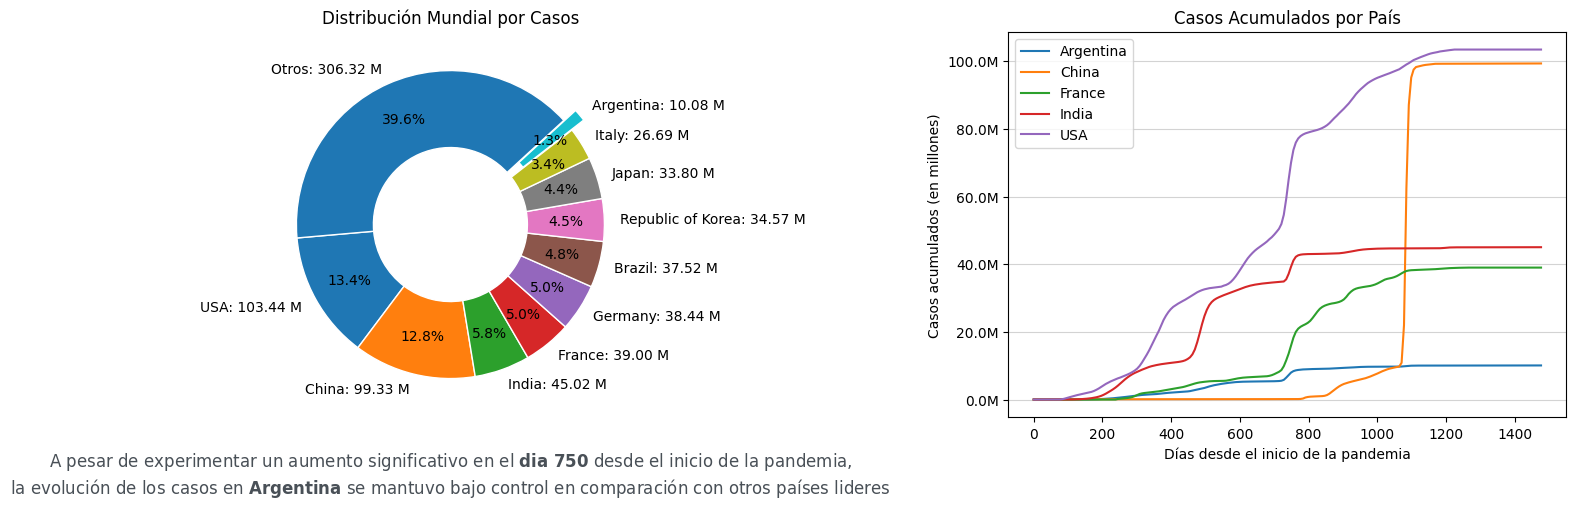

In [110]:
# Gráfico de Donuts

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
explode =(0,0,0,0,0,0,0,0,0,0.1,0)
wedges, texts, autotexts = axs[0].pie(top_10_paises_mas_argentina,labels=top_10_paises_mas_argentina.index,explode=explode, autopct='%1.1f%%', textprops={'fontsize': 10}, pctdistance=0.75, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))


for text, autotext in zip(texts, autotexts):
    valor_en_millones = top_10_paises_mas_argentina[text.get_text()] / 1000000
    text.set_text(f'{text.get_text()}: {valor_en_millones:.2f} M')

axs[0].set_title('Distribución Mundial por Casos')  # Título del gráfico

# Ajustar el espaciado vertical entre los dos subgráficos
plt.subplots_adjust(wspace=0.5)


#Gráfico de Líneas

for pais in total_acumulado_top_5.index:
    days_since_start = (total_acumulado_top_5.columns - total_acumulado_top_5.columns[0]).days
    axs[1].plot(days_since_start, total_acumulado_top_5.loc[pais], label=pais)

# Agregar conclusión debajo del gráfico
conclusion_text =("A pesar de experimentar un aumento significativo en el $\\bf{dia}$ $\\bf{750}$ desde el inicio de la pandemia,\n"
                  "la evolución de los casos en $\\bf{Argentina}$ se mantuvo bajo control en comparación con otros países lideres")

# Configurar el texto de la conclusión
conclusion = axs[0].text(0.5, -0.15, conclusion_text, transform=axs[0].transAxes,
                         fontsize=12, color='#495057', ha='center', va='center')


# Función para formatear los valores en el eje Y en millones
def millions_formatter(value, _):
    return f'{value / 1e6:.1f}M'

# Títulos de los ejes y del gráfico
axs[1].set_xlabel('Días desde el inicio de la pandemia')  # Título del eje X
axs[1].set_ylabel('Casos acumulados (en millones)')  # Título del eje Y
axs[1].set_title('Casos Acumulados por País')  # Título del gráfico

# Aplicar el formateador a los ticks del eje Y
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axs[1].grid(axis = 'y', color = 'lightgray', linestyle = 'solid')
axs[1].legend(loc = 'upper left')

plt.show()

###**Pregunta_2: ¿Cual ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?**

In [111]:
#Daily New Cases
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.set_index('Country')
grouped_df = grouped_df.loc[['Argentina']]
fechas = grouped_df.columns
new_cases = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)
new_cases = new_cases[new_cases > 0]
new_cases

Date_reported
2020-03-08      22.0
2020-03-15     109.0
2020-03-22     405.0
2020-03-29     746.0
2020-04-05     791.0
               ...  
2023-12-17     620.0
2023-12-24     609.0
2023-12-31     854.0
2024-01-07    1635.0
2024-01-14    2583.0
Length: 191, dtype: float64

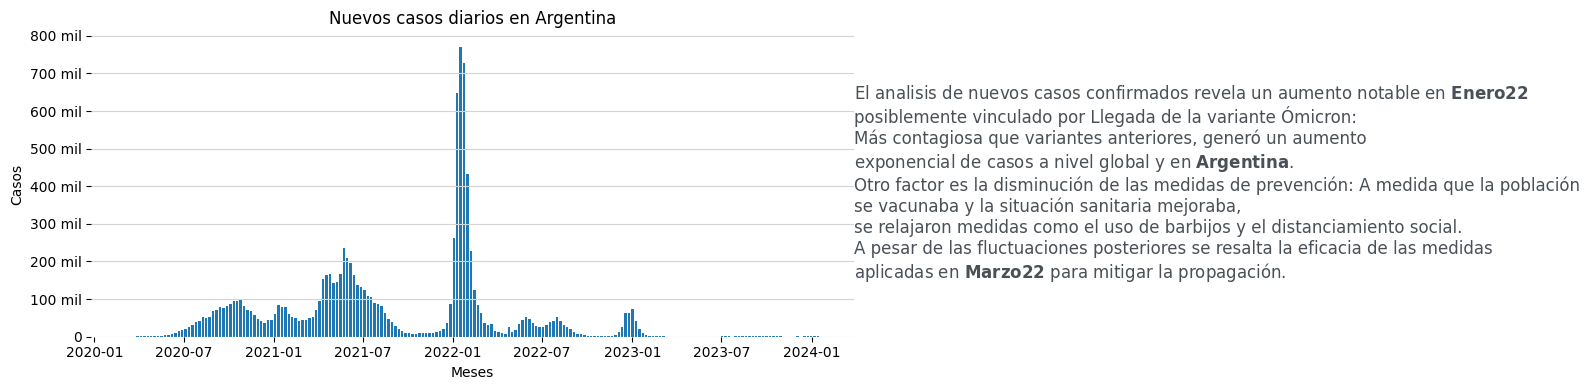

In [112]:
# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(16, 4))
bars = ax.bar(new_cases.index, new_cases.values/1e3,width=5)

# Función para formatear los valores del eje y como miles con la palabra "mil"
def format_thousands(value, _):
    if value == 0:
        return "0"
    else:
        return f"{value:.0f} mil"

ax.set_xlabel('Meses')  # Título del eje X
ax.set_ylabel('Casos')  # Título del eje Y
ax.set_title('Nuevos casos diarios en Argentina')  # Título del gráfico

# Elimina los bordes del gráfico
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

# Aplica el formato a los ticks del eje y como miles con la palabra "mil"
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Aplica el formato a los ticks del eje y
ax.grid(axis = 'y', color = 'lightgray', linestyle = 'solid')


conclusion_text=('El analisis de nuevos casos confirmados revela un aumento notable en $\\bf{Enero22}$\nposiblemente vinculado por Llegada de la variante Ómicron:\n'
'Más contagiosa que variantes anteriores, generó un aumento\nexponencial de casos a nivel global y en $\\bf{Argentina}$.\n'
'Otro factor es la disminución de las medidas de prevención: A medida que la población\nse vacunaba y la situación sanitaria mejoraba,\nse relajaron medidas como el uso de barbijos y el distanciamiento social.'
'\nA pesar de las fluctuaciones posteriores se resalta la eficacia de las medidas\naplicadas en $\\bf{Marzo 22}$ para mitigar la propagación.')
ax.text(1, 0.5, conclusion_text, transform=ax.transAxes, va='center', ha='left',color='#495057',fontsize=12)

# Ajusta el diseño del gráfico si es necesario
plt.tight_layout()

# Muestra el gráfico
plt.show()

###**Pregunta_3.¿Cual es la evolución del índice de letalidad del covid-19 en el país Argentina, comparado con los países con los índices históricos más elevados?**

In [113]:
#Lethality Rate by Country
def get_max_row(group, column):
    return group.loc[group[column].idxmax()]

result = df_covid_limpio.groupby(['Country', df_covid_limpio['Date_reported'].dt.to_period("M")]).apply(lambda group: get_max_row(group, 'lethality_rate'))
result.reset_index(drop=True, inplace=True)
top_4_paises = result.groupby('Country')['lethality_rate'].mean().nlargest(4).index
result = result[result['Country'].isin(top_4_paises)]
result_pais = df_covid_limpio[df_covid_limpio['Country'] == 'Argentina'].groupby(df_covid_limpio['Date_reported'].dt.to_period("M")).apply(lambda group: get_max_row(group, 'lethality_rate'))
result_pais.reset_index(drop=True, inplace=True)
result_final = pd.concat([result, result_pais])
result_final

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
6543,2020-01-05,MX,Mexico,0,0,0,0,0.00
6544,2020-02-02,MX,Mexico,0,0,0,0,0.00
6545,2020-03-29,MX,Mexico,1214,2117,24,28,1.32
6546,2020-04-26,MX,Mexico,9264,22764,1453,2758,12.12
6547,2020-09-13,MX,Mexico,35339,728985,3208,89266,12.25
...,...,...,...,...,...,...,...,...
44,2023-09-03,AR,Argentina,3104,10059917,15,130571,1.30
45,2023-10-01,AR,Argentina,1317,10067998,9,130634,1.30
46,2023-11-05,AR,Argentina,478,10072166,4,130664,1.30
47,2023-12-03,AR,Argentina,608,10074309,1,130682,1.30


In [114]:
top_4_paises

Index(['Sudan', 'Peru', 'Mexico', 'Syrian Arab Republic'], dtype='object', name='Country')

In [115]:
result_pais

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AR,Argentina,0,0,0,0,0.00
1,2020-02-02,AR,Argentina,0,0,0,0,0.00
2,2020-03-15,AR,Argentina,109,131,8,9,6.87
3,2020-04-26,AR,Argentina,1398,5464,132,411,7.52
4,2020-05-03,AR,Argentina,1289,6753,115,526,7.79
5,2020-06-07,AR,Argentina,7297,29703,358,1664,5.60
6,2020-07-05,AR,Argentina,20195,93640,903,4403,4.70
7,2020-08-02,AR,Argentina,41965,231395,1456,9930,4.29
8,2020-09-06,AR,Argentina,72320,524195,2324,19815,3.78
9,2020-10-04,AR,Argentina,87054,846449,2523,29580,3.49


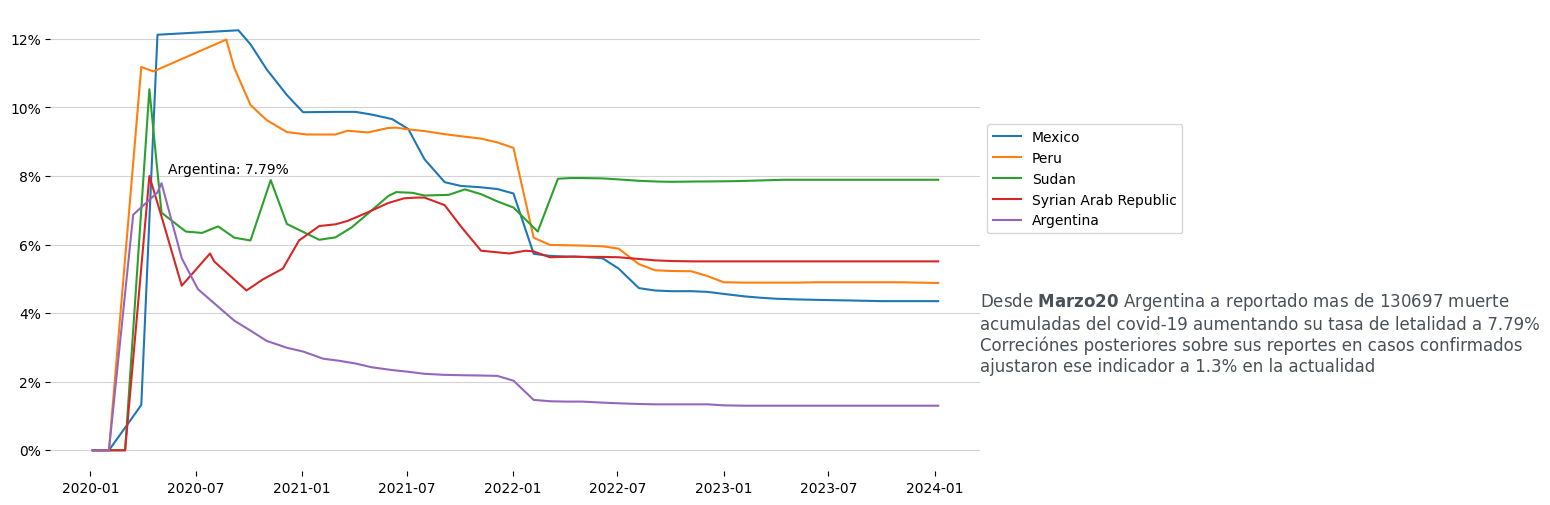

In [116]:
# Crea el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 6))

def format_percentage(value, _):
    if value.is_integer():
        return f"{int(value)}%"

for pais in result_final['Country'].unique():
    country_data = result_final[result_final['Country'] == pais]
    line, = ax.plot(country_data['Date_reported'], country_data['lethality_rate'], label=pais)


# Encuentra el máximo y su índice
max_lethality = country_data['lethality_rate'].max()
max_index = country_data['lethality_rate'].idxmax()

# Agrega una etiqueta al punto máximo
ax.annotate(f"{pais}: {max_lethality:.2f}%",
            xy=(country_data['Date_reported'][max_index], max_lethality),
            xytext=(5, 5), textcoords='offset points', ha='left',va='bottom')

# Elimina los bordes del gráfico
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

# Aplica el formato a los ticks del eje y como porcentaje
ax.yaxis.set_major_formatter(FuncFormatter(format_percentage))

# Aplica el formato a los ticks del eje y
ax.grid(axis='y', color='lightgray', linestyle='solid')

# Agrega la leyenda solo para las líneas con etiquetas
ax.legend(loc= 'lower left', bbox_to_anchor=(1, 0.5))


conclusion_text=('Desde $\\bf{Marzo20}$ Argentina a reportado mas de 130697 muerte\n'
'acumuladas del covid-19 aumentando su tasa de letalidad a 7.79%\n'
'Correciónes posteriores sobre sus reportes en casos confirmados \najustaron ese indicador a 1.3% en la actualidad')
ax.text(1,0.3, conclusion_text, transform=ax.transAxes, va='center', ha='left',color='#495057',fontsize=12)


# Muestra el gráfico
plt.show()


###**Pregunta_4: Desde una perspectiva demográfica ¿Cuales son las características que tienen un mayor impacto en el índice de letalidad de un país?**

In [118]:
#Características demográficas más relevantes
df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported'] <= '2020-12-31']
df_agrupado = df_filtrado.groupby(['Country_code', 'Country'], as_index=False)['lethality_rate'].mean()
df_final = pd.merge(df_agrupado, df_population_trabajado, on='Country_code', how='inner')
columnas_seleccionadas = ['lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_final = df_final[columnas_seleccionadas]

X = df_final.drop(['lethality_rate'], axis=1)
y = df_final['lethality_rate']
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

Population_Density    0.249674
Female_Population     0.229132
Life_Expectancy       0.207577
Male_Population       0.165126
Total_Population      0.148490
dtype: float64

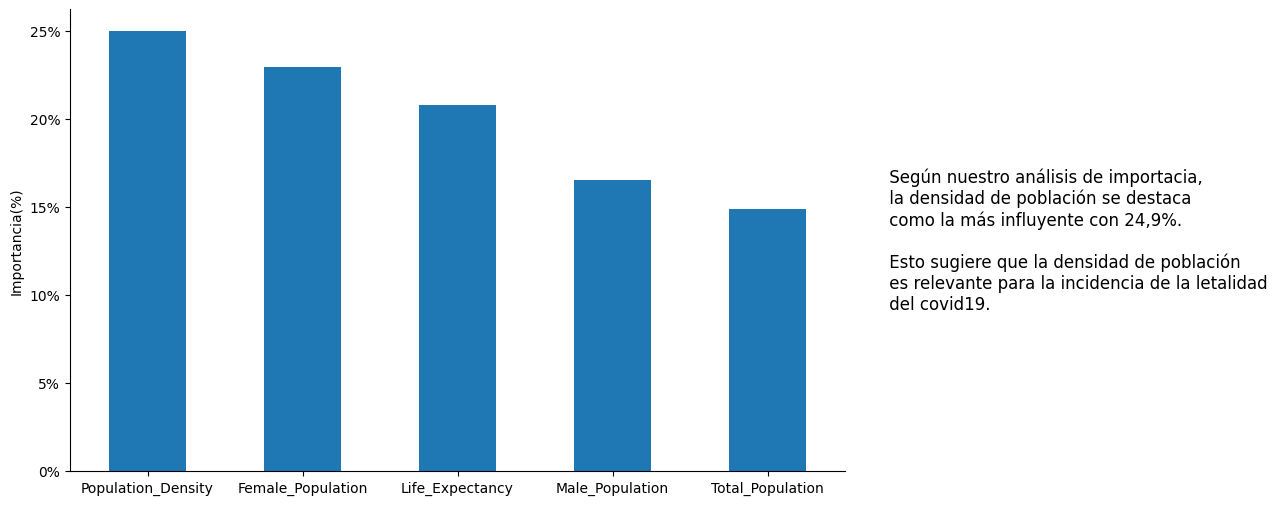

In [160]:
# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
feature_importances.plot(kind='bar', ax=ax)

# Elimina los bordes del gráfico
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Añade etiquetas y formato al eje y
ax.set_ylabel('Importancia(%)')
ax.yaxis.set_major_formatter('{x:.0%}')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


# Agrega un comentario a la derecha del gráfico
comment = " Según nuestro análisis de importacia,\n la densidad de población se destaca\n como la más influyente con 24,9%.\n\n Esto sugiere que la densidad de población\n es relevante para la incidencia de la letalidad\n del covid19. "
plt.annotate(comment, xy=(1.05, 0.5), xycoords='axes fraction', fontsize=12, ha='left', va='center')
plt.show()


###**Pregunta_5 ¿Cual es la distribución de dosis únicas, primeras dosis y segundas dosis de vacunas en todas las provincias de Argentina?**

In [123]:
dataset=pd.read_csv('Covid19VacunasAgrupadas.csv',sep=',')

In [124]:
dataset.head()

,jurisdiccion_codigo_indec,jurisdiccion_nombre,vacuna_nombre,dosis_unica_cantidad,primera_dosis_cantidad,segunda_dosis_cantidad,dosis_adicional_cantidad,dosis_refuerzo_cantidad
0,6,Buenos Aires,AstraZeneca ChAdOx1 S recombinante,0,3648667,4022690,832866,1121869
1,6,Buenos Aires,COVISHIELD ChAdOx1nCoV COVID 19,0,251418,383,0,0
2,6,Buenos Aires,Cansino Ad5 nCoV,90334,0,7732,1632,110492
3,6,Buenos Aires,Moderna 010 mg mL,0,52514,31855,0,183235
4,6,Buenos Aires,Moderna ARNm 020 mg mL,0,426920,1263911,3185,4551678


In [125]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   jurisdiccion_codigo_indec  286 non-null    int64 
 1   jurisdiccion_nombre        286 non-null    object
 2   vacuna_nombre              286 non-null    object
 3   dosis_unica_cantidad       286 non-null    int64 
 4   primera_dosis_cantidad     286 non-null    int64 
 5   segunda_dosis_cantidad     286 non-null    int64 
 6   dosis_adicional_cantidad   286 non-null    int64 
 7   dosis_refuerzo_cantidad    286 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 18.0+ KB


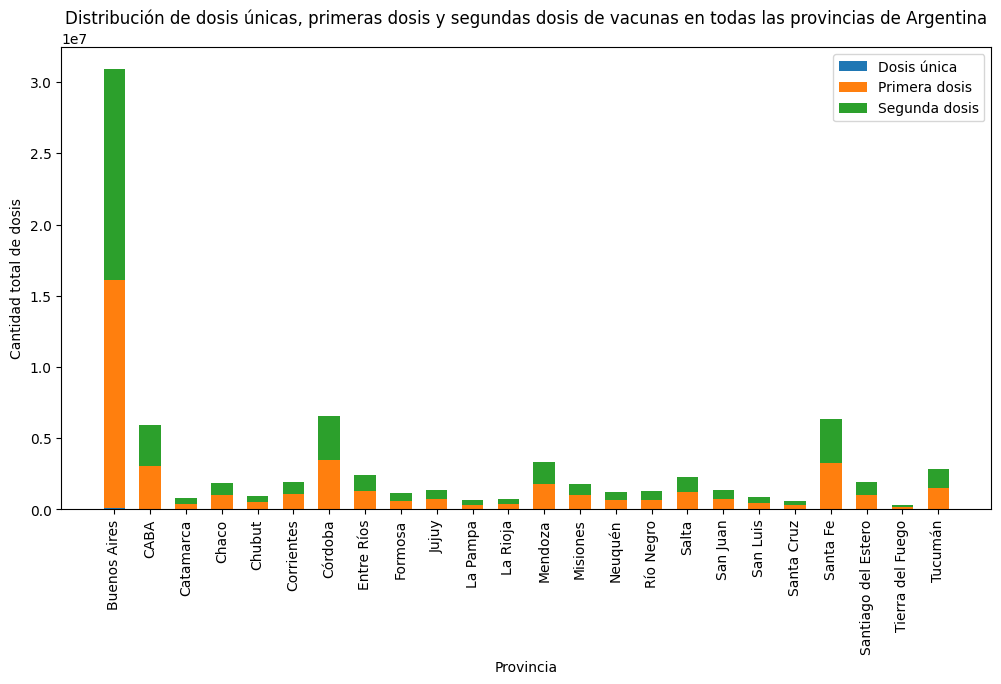

In [126]:
# Gráfico de barras apiladas para mostrar la distribución de dosis por provincia y categoría de dosis
plt.figure(figsize=(12, 6))

# Agrupar por provincia y sumar las cantidades de dosis para cada categoría
distribucion_por_provincia = dataset.groupby('jurisdiccion_nombre').agg({
    'dosis_unica_cantidad': 'sum',
    'primera_dosis_cantidad': 'sum',
    'segunda_dosis_cantidad': 'sum'
}).reset_index()

# Barplot apilado para mostrar la distribución de dosis por provincia
bar_width = 0.6
bar_positions = range(len(distribucion_por_provincia))

plt.bar(bar_positions, distribucion_por_provincia['dosis_unica_cantidad'], width=bar_width, label='Dosis única')
plt.bar(bar_positions, distribucion_por_provincia['primera_dosis_cantidad'], width=bar_width, bottom=distribucion_por_provincia['dosis_unica_cantidad'], label='Primera dosis')
plt.bar(bar_positions, distribucion_por_provincia['segunda_dosis_cantidad'], width=bar_width, bottom=distribucion_por_provincia['dosis_unica_cantidad'] + distribucion_por_provincia['primera_dosis_cantidad'], label='Segunda dosis')

plt.xlabel('Provincia')
plt.ylabel('Cantidad total de dosis')
plt.title('Distribución de dosis únicas, primeras dosis y segundas dosis de vacunas en todas las provincias de Argentina')
plt.xticks(bar_positions, distribucion_por_provincia['jurisdiccion_nombre'], rotation=90)
plt.legend()
plt.show()


In [127]:
distribucion_por_provincia['total']=distribucion_por_provincia['dosis_unica_cantidad']+distribucion_por_provincia['primera_dosis_cantidad']+distribucion_por_provincia['segunda_dosis_cantidad']

In [128]:
distribucion_por_provincia.head()

,jurisdiccion_nombre,dosis_unica_cantidad,primera_dosis_cantidad,segunda_dosis_cantidad,total
0,Buenos Aires,91036,16047888,14756149,30895073
1,CABA,33814,2991723,2903301,5928838
2,Catamarca,2709,407153,377364,787226
3,Chaco,11974,1015242,851452,1878668
4,Chubut,3903,511053,447587,962543


In [129]:
distribucion_bsas=dataset[dataset['jurisdiccion_nombre']== 'Buenos Aires']
distribucion_bsas

,jurisdiccion_codigo_indec,jurisdiccion_nombre,vacuna_nombre,dosis_unica_cantidad,primera_dosis_cantidad,segunda_dosis_cantidad,dosis_adicional_cantidad,dosis_refuerzo_cantidad
0,6,Buenos Aires,AstraZeneca ChAdOx1 S recombinante,0,3648667,4022690,832866,1121869
1,6,Buenos Aires,COVISHIELD ChAdOx1nCoV COVID 19,0,251418,383,0,0
2,6,Buenos Aires,Cansino Ad5 nCoV,90334,0,7732,1632,110492
3,6,Buenos Aires,Moderna 010 mg mL,0,52514,31855,0,183235
4,6,Buenos Aires,Moderna ARNm 020 mg mL,0,426920,1263911,3185,4551678
5,6,Buenos Aires,Moderna Bivariante BA 4 5,276,16,13,0,388273
6,6,Buenos Aires,Pfizer BioNTech Comirnaty,0,1374329,1452489,77612,5408240
7,6,Buenos Aires,Pfizer Bivariante BA 4 5,0,0,0,0,246743
8,6,Buenos Aires,Pfizer Pediátrica,0,20672,10764,141456,2075
9,6,Buenos Aires,Sinopharm Vacuna SARSCOV 2 inactivada,0,5957510,5272039,1662,13062


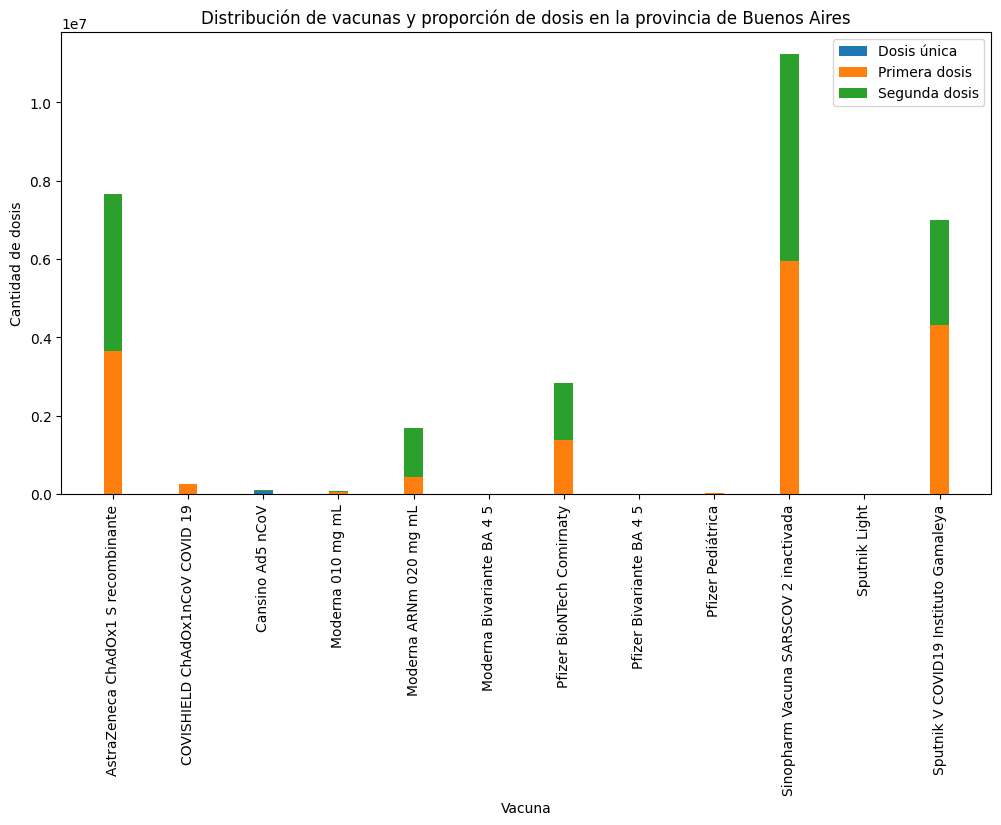

In [130]:
# Gráfico de distribución de vacunas y evolución de la proporción de dosis únicas, primeras dosis y segundas dosis en el tiempo
plt.figure(figsize=(12, 6))

distribucion_bsas=dataset[dataset['jurisdiccion_nombre']== 'Buenos Aires']

# Agrupar por vacuna y sumar las cantidades de dosis
distribucion_bsas = distribucion_bsas.groupby('vacuna_nombre').agg({
    'dosis_unica_cantidad': 'sum',
    'primera_dosis_cantidad': 'sum',
    'segunda_dosis_cantidad': 'sum'
}).reset_index()

# Barplot para mostrar la distribución de vacunas
bar_width = 0.25
bar_positions = range(len(distribucion_bsas))

plt.bar(bar_positions, distribucion_bsas['dosis_unica_cantidad'], width=bar_width, label='Dosis única')
plt.bar(bar_positions, distribucion_bsas['primera_dosis_cantidad'], width=bar_width, bottom=distribucion_bsas['dosis_unica_cantidad'], label='Primera dosis')
plt.bar(bar_positions, distribucion_bsas['segunda_dosis_cantidad'], width=bar_width, bottom=distribucion_bsas['dosis_unica_cantidad'] + distribucion_bsas['primera_dosis_cantidad'], label='Segunda dosis')

plt.xlabel('Vacuna')
plt.ylabel('Cantidad de dosis')
plt.title('Distribución de vacunas y proporción de dosis en la provincia de Buenos Aires')
plt.xticks(bar_positions, distribucion_bsas['vacuna_nombre'], rotation=90)
plt.legend()
plt.show()


In [131]:
distribucion_bsas

,vacuna_nombre,dosis_unica_cantidad,primera_dosis_cantidad,segunda_dosis_cantidad
0,AstraZeneca ChAdOx1 S recombinante,0,3648667,4022690
1,COVISHIELD ChAdOx1nCoV COVID 19,0,251418,383
2,Cansino Ad5 nCoV,90334,0,7732
3,Moderna 010 mg mL,0,52514,31855
4,Moderna ARNm 020 mg mL,0,426920,1263911
5,Moderna Bivariante BA 4 5,276,16,13
6,Pfizer BioNTech Comirnaty,0,1374329,1452489
7,Pfizer Bivariante BA 4 5,0,0,0
8,Pfizer Pediátrica,0,20672,10764
9,Sinopharm Vacuna SARSCOV 2 inactivada,0,5957510,5272039


**Distribución Heterogénea de Vacunas**: El gráfico destaca que diferentes provincias pueden estar utilizando distintas vacunas o presentando variaciones en la proporción de dosis únicas, primeras dosis y segundas dosis. Esta heterogeneidad puede deberse a factores como la disponibilidad y aprobación de distintas vacunas en cada región, así como a estrategias específicas de distribución y administración.
Esta variabilidad en la elección y aplicación de vacunas podría reflejar adaptaciones locales a la situación epidemiológica, logísticas o incluso a la oferta de vacunas en determinadas áreas. La capacidad de adaptación a condiciones cambiantes y la implementación eficaz de estrategias de vacunación específicas para cada provincia pueden influir en la distribución de dosis en el país.